In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [5]:
data=pd.read_csv("diabetes-dataset.csv")

In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [7]:
#Checking null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [8]:
data.shape

(2000, 9)

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


# Visualizing the data

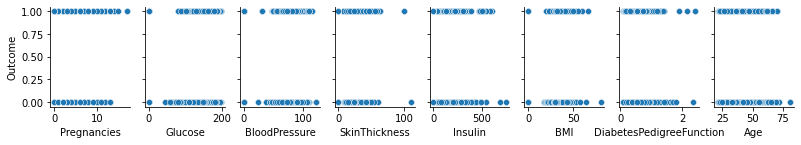

In [88]:
sns.pairplot(data, x_vars=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'],y_vars='Outcome',kind="scatter",height=2,aspect=0.7)

In [11]:
#The above plot shows that attributes have squiggle relationship.

<AxesSubplot:>

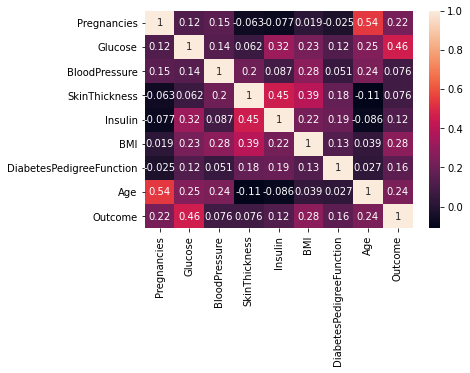

In [12]:
sns.heatmap(data.corr(),annot=True)

In [95]:
#From the above correlation plot its evident that increase in age & Preganancy are associated with diabetes

# Splitting the features and the target

In [14]:
X=data.drop("Outcome",axis=1)
Y=data["Outcome"]

In [15]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138,62,35,0,33.6,0.127,47
1,0,84,82,31,125,38.2,0.233,23
2,0,145,0,0,0,44.2,0.630,31
3,0,135,68,42,250,42.3,0.365,24
4,1,139,62,41,480,40.7,0.536,21


In [16]:
Y.head()

0    1
1    0
2    1
3    1
4    0
Name: Outcome, dtype: int64

# Splitting the training and test data

In [17]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

# LogisticRegression model

In [18]:
model=LogisticRegression(max_iter=50000)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=50000)

# LogisticRegression Accuracy

In [19]:
#Training data accuracy
XtrainPred=model.predict(X_train)
trainingDataAccuracy=accuracy_score(XtrainPred,Y_train)
print("Accuracy of the training data :",trainingDataAccuracy)

Accuracy of the training data : 0.773125


In [20]:
#Accuracy of test data
XtestPred=model.predict(X_test)
testDataAccuracy=accuracy_score(XtestPred,Y_test)
print("Accuracy of the test data is :",testDataAccuracy)

Accuracy of the test data is : 0.7875


# kNeighbors Classifier model

In [21]:
model=KNeighborsClassifier()
model.fit(X_train,Y_train)

KNeighborsClassifier()

# kNeighbors Classifier model Accuracy

In [22]:
#Training data accuracy
XTrainPred=model.predict(X_train)
TrainDataAccuracy=accuracy_score(XTrainPred,Y_train)
print("The accuracy of Training data is : ",TrainDataAccuracy)

The accuracy of Training data is :  0.89875


In [23]:
#Accuracy of test data
XtestPred=model.predict(X_test)
testDataAccuracy=accuracy_score(XtestPred,Y_test)
print("Accuracy of the test data is :",testDataAccuracy)

Accuracy of the test data is : 0.8075


# DecisionTreeClassifier model

In [24]:
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

# DecisionTreeClassifier model Accuracy

In [25]:
#Training data accuracy
XTrainPred=model.predict(X_train)
TrainDataAccuracy=accuracy_score(XTrainPred,Y_train)
print("The accuracy of Training data is : ",TrainDataAccuracy)

The accuracy of Training data is :  1.0


In [26]:
#Accuracy of test data
XtestPred=model.predict(X_test)
testDataAccuracy=accuracy_score(XtestPred,Y_test)
print("Accuracy of the test data is :",testDataAccuracy)

Accuracy of the test data is : 0.985


# RandomForestClassifier model

In [27]:
model=RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

# RandomForestClassifier model Accuracy

In [28]:
#Training data accuracy
XTrainPred=model.predict(X_train)
TrainDataAccuracy=accuracy_score(XTrainPred,Y_train)
print("The accuracy of Training data is : ",TrainDataAccuracy)

The accuracy of Training data is :  1.0


In [29]:
#Accuracy of test data
XtestPred=model.predict(X_test)
testDataAccuracy=accuracy_score(XtestPred,Y_test)
print("Accuracy of the test data is :",testDataAccuracy)

Accuracy of the test data is : 0.9725


# Building a User Interface to predict whether the patient as Diabetes or not

In [30]:
#As the Decision Tree Classifier has high Accuracy(98.5%). Lets choose Decision Tree Model over the other models.

# model=DecisionTreeClassifier()
model.fit(X_train,Y_train)

In [56]:
user_input=(0,179,50,36,159,37.8,0.455,22


)

#changing the user_input to numpy array
userInputArray=np.asarray(user_input)
#reshaping the numpy array
userInputReshaped=userInputArray.reshape(1,-1)
prediction=model.predict(userInputReshaped)
print(prediction)
if(prediction[0]==1):
  print("THIS PATIENT HAS DIABETES")
else:
    print("THIS PATIENT DOES NOT HAVE DIABETES")

[1]
THIS PATIENT HAS DIABETES


# Finally, We got to know that the Decision Tree Classifier gives us the best output with high accuracy of around 98.5%.